In [19]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

In [20]:
from haversine import haversine
# packages for mapping


In [21]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_00)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [22]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [23]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
%matplotlib inline

In [24]:
train_df['pickup_datetime']= pd.to_datetime(train_df['pickup_datetime'])


In [25]:
train_df['pickup_day_of_week']=train_df['pickup_datetime'].dt.dayofweek

In [26]:
train_df['pickup_month']=train_df['pickup_datetime'].dt.month

In [27]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38,-73.976676,40.785630,-73.959196,40.775114,1,5,9
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37,-73.992103,40.671385,-73.992103,40.671385,2,0,9
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00,-73.978423,40.751135,-73.993397,40.762197,5,4,4
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00,-73.980317,40.759482,-73.976832,40.743122,1,4,7
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00,-74.006635,40.741598,-73.999450,40.745702,1,3,12


In [28]:
train_df['pickup_date']=train_df['pickup_datetime'].dt.date

In [29]:
train_df['key'].unique()


array(['2009-06-15 17:26:21.0000001', '2010-01-05 16:52:16.0000002',
       '2011-08-18 00:35:00.00000049', ...,
       '2013-04-26 14:03:00.000000118', '2011-07-08 00:29:00.00000099',
       '2009-12-31 14:30:00.00000021'], dtype=object)

In [30]:
train_df.loc[train_df["pickup_date"] == "2009-12-31"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date


In [31]:
train_df.loc[train_df["key"] == "756707"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date


In [32]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

In [33]:
train_df['pickup_date'] =train_df['pickup_date'].astype(str)


In [34]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

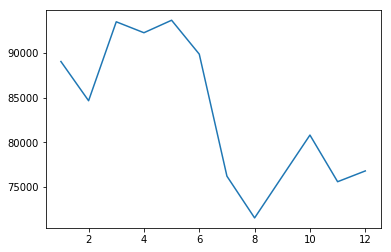

In [35]:
train_df["pickup_month"].value_counts().sort_index().plot()

In [36]:
train_df.sort_values('pickup_day_of_week', ascending = True, inplace= True)

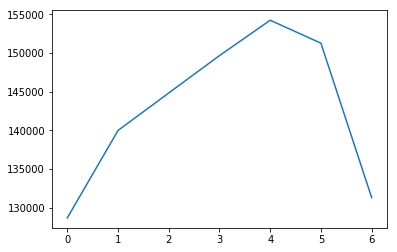

In [37]:
train_df["pickup_day_of_week"].value_counts().sort_index().plot()

In [38]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour

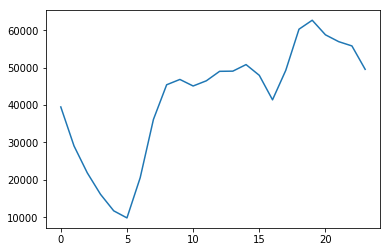

In [39]:
train_df['pickup_hour'].value_counts().sort_index().plot()

In [40]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year

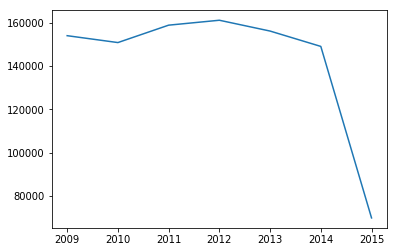

In [41]:
train_df['pickup_year'].value_counts().sort_index().plot()

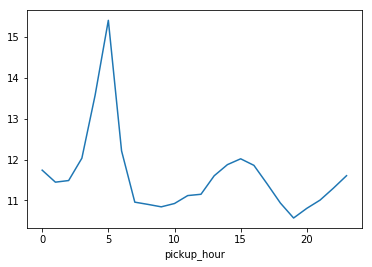

In [42]:
train_df.groupby('pickup_hour')['fare_amount'].mean().plot()

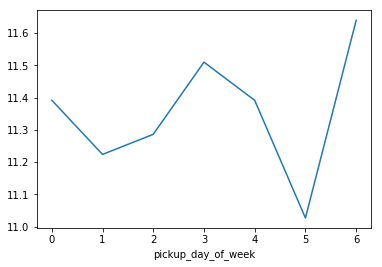

In [43]:
train_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

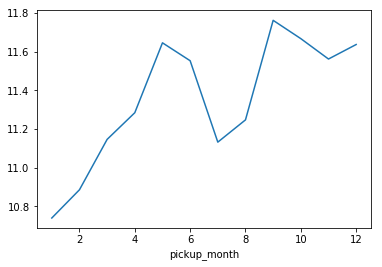

In [44]:
train_df.groupby('pickup_month')['fare_amount'].mean().plot()

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 305517
Data columns (total 13 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 106.8+ MB


In [46]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_hour,pickup_year
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924,3.039856,6.267875,13.509477,2011.741106
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911,1.949970,3.436243,6.513840,1.860754
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,0.000000,1.000000,0.000000,2009.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,1.000000,3.000000,9.000000,2010.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,3.000000,6.000000,14.000000,2012.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,5.000000,9.000000,19.000000,2013.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,6.000000,12.000000,23.000000,2015.000000


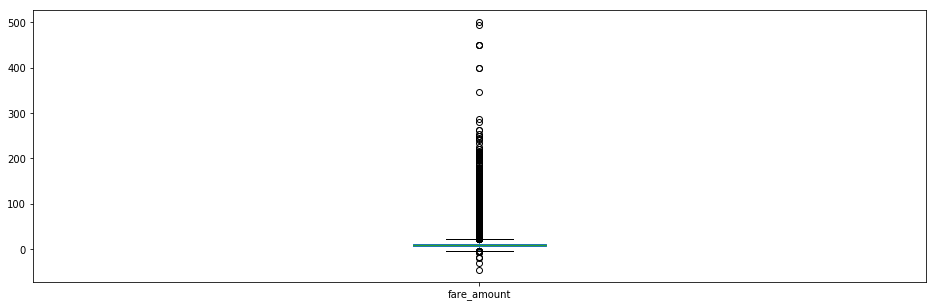

In [47]:
train_df["fare_amount"].plot.box(figsize=(16,5))  

In [48]:
train_df['id'] = train_df.index

In [49]:
new =train_df.groupby(pd.Grouper(key='pickup_datetime', freq='15T')).apply(lambda x: x['id'])

In [50]:
train_df['id'] = train_df.index

In [51]:
new

pickup_datetime            
2009-01-01 00:00:00  880228    880228
                     661006    661006
                     756707    756707
                     745620    745620
2009-01-01 00:15:00  964259    964259
                     915988    915988
2009-01-01 00:30:00  297860    297860
                     124750    124750
                     876677    876677
                     82469      82469
2009-01-01 00:45:00  124445    124445
                     973236    973236
                     965480    965480
2009-01-01 01:00:00  760438    760438
                     894290    894290
                     766885    766885
2009-01-01 01:15:00  945037    945037
                     76195      76195
                     102243    102243
                     773755    773755
                     542263    542263
2009-01-01 01:30:00  12739      12739
2009-01-01 01:45:00  709206    709206
                     307980    307980
                     674362    674362
2009-01-01 02:00:00  1

In [52]:
pd.Grouper(key='pickup_datetime', freq='15m')

TimeGrouper(key='pickup_datetime', freq=<15 * MonthEnds>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [53]:
new.index.get_level_values('pickup_datetime')

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:15:00', '2009-01-01 00:15:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               ...
               '2015-06-30 23:15:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00'],
              dtype='datetime64[ns]', name='pickup_datetime', length=1000000, freq='15T')

In [54]:
train_df.loc[train_df["key"] == '799435' ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id


In [55]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
pickup_hour                    int64
pickup_year                    int64
id                             int64
dtype: object

In [56]:
interval_df=pd.DataFrame({'interval':new.index.get_level_values(0), 'id':new.index.get_level_values(1)})

In [57]:
new.index.get_level_values(1)

Int64Index([880228, 661006, 756707, 745620, 964259, 915988, 297860, 124750,
            876677,  82469,
            ...
            182743, 506007, 751978, 240182, 323864, 286276, 955575, 915826,
            751350, 785182],
           dtype='int64', length=1000000)

In [58]:
interval_df.dtypes

interval    datetime64[ns]
id                   int64
dtype: object

In [59]:
interval_df.tail()

,interval,id
999995,2015-06-30 23:30:00,286276
999996,2015-06-30 23:45:00,955575
999997,2015-06-30 23:45:00,915826
999998,2015-06-30 23:45:00,751350
999999,2015-06-30 23:45:00,785182


In [60]:
train_df.loc[train_df["id"] == 751350]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id
751350,2015-06-30 23:53:23.0000002,3.5,2015-06-30 23:53:23,-73.97802,40.757439,-73.980705,40.753544,1,1,6,2015-06-30,23,2015,751350


In [61]:
train_df=pd.merge(train_df, interval_df, left_on = 'id', right_on = 'id', how = 'inner')

In [62]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00


In [63]:
train_df['interval_time']=train_df['interval'].dt.time

In [64]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00


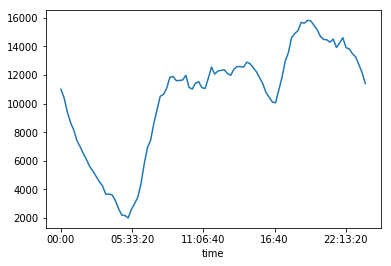

In [65]:
train_df['interval_time'].value_counts().sort_index().plot()

In [66]:
train_df["pickup_longitude"] = train_df['pickup_longitude'].apply(lambda x:round(x,2))


In [67]:
train_df["pickup_latitude"] = train_df['pickup_latitude'].apply(lambda x:round(x,2))


In [68]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00


In [69]:
train_df['demand']=train_df.groupby(['interval','pickup_longitude','pickup_latitude'])['interval'].transform('count')

In [70]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time,demand
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00,1
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00,1
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00,3
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00,1
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00,1


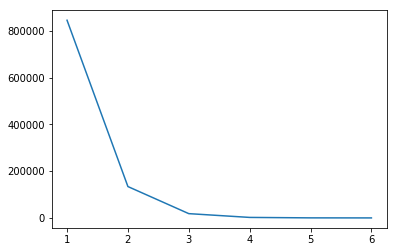

In [71]:
train_df['demand'].value_counts().sort_index().plot()

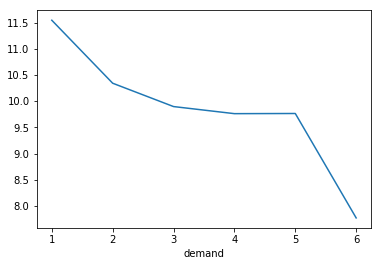

In [72]:
train_df.groupby('demand')['fare_amount'].mean().plot()

In [73]:
def distance(lat1, lon1, lat2, lon2):
    """
    calculates the Manhattan distance between 2 points using their coordinates   
    Returns
    -------
    d: float
        The Manhattan distance between the two points in kilometers
    """
    d = haversine((lat1, lon1), (lat2, lon1)) + haversine((lat2, lon1), (lat2, lon2))
    return d

# The distance is calculated in kilometers
train_df["distance"] = train_df.apply(lambda row: distance(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)

In [74]:
train_df["distance"]

0          0.994348
1          1.333581
2          5.648338
3         11.774684
4          2.811899
5          2.236873
6          1.916328
7          2.848470
8          5.543908
9          0.307994
10         1.779232
11         9.505639
12         1.700778
13         2.724473
14         3.071089
15        21.839867
16         2.755513
17         4.304596
18         0.542047
19         0.701315
20         1.481350
21         3.030238
22         6.008949
23         2.902709
24         9.485814
25         0.582736
26         1.227529
27         4.691100
28         4.743672
29         0.000000
            ...    
999970     8.208024
999971     5.758488
999972     5.287813
999973     1.778609
999974     0.823994
999975     3.533078
999976     1.085037
999977    34.915028
999978     7.348836
999979     0.982604
999980    23.386542
999981     8.747947
999982     1.553576
999983     1.728682
999984     2.445260
999985     1.607214
999986     3.056351
999987    15.560204
999988     7.503730


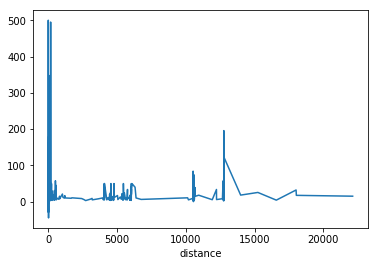

In [78]:
train_df.groupby('distance')['fare_amount'].mean().plot()

In [79]:
train_df["fare_amount"]

0          4.50
1          4.50
2         10.90
3         29.00
4          6.10
5          6.90
6          6.10
7          7.70
8          8.10
9         56.80
10         4.50
11        22.89
12         4.10
13        13.50
14         6.10
15        44.00
16         6.90
17         7.30
18         5.00
19         4.50
20         4.90
21         7.00
22        14.00
23         6.50
24        16.10
25         6.50
26         7.50
27         9.70
28        10.50
29         4.90
          ...  
999970    15.50
999971    15.00
999972    11.00
999973     7.00
999974     4.50
999975     8.90
999976     7.30
999977    57.33
999978    12.10
999979     4.90
999980    48.33
999981    15.70
999982     6.50
999983     6.50
999984     6.50
999985     5.30
999986    10.00
999987    17.30
999988    10.90
999989    10.10
999990    13.70
999991     9.50
999992    31.83
999993    19.30
999994     3.70
999995    14.90
999996    11.50
999997    24.00
999998     4.90
999999     7.50
Name: fare_amount, Lengt

In [80]:
train_df['distance'].max()

22139.91139709688

In [81]:
train_df.to_csv("train_formatted.csv")

In [82]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,1000000.0,11.348079,9.822090,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,1000000.0,-72.526588,12.057929,-3377.680000,-73.990000,-73.980000,-73.970000,2522.270000
pickup_latitude,1000000.0,39.928901,7.626147,-3116.290000,40.730000,40.750000,40.770000,2621.630000
dropoff_longitude,999990.0,-72.527860,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,1000000.0,1.684924,1.323911,0.000000,1.000000,1.000000,2.000000,208.000000
pickup_day_of_week,1000000.0,3.039856,1.949970,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_month,1000000.0,6.267875,3.436243,1.000000,3.000000,6.000000,9.000000,12.000000
pickup_hour,1000000.0,13.509477,6.513840,0.000000,9.000000,14.000000,19.000000,23.000000
pickup_year,1000000.0,2011.741106,1.860754,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [83]:
train_df["interval"]

0        2009-06-15 17:15:00
1        2009-08-03 23:00:00
2        2011-07-11 13:00:00
3        2012-12-17 22:45:00
4        2011-02-28 22:00:00
5        2010-03-29 13:00:00
6        2012-03-26 02:00:00
7        2011-04-18 14:00:00
8        2012-07-02 22:30:00
9        2012-10-01 00:15:00
10       2009-09-21 20:45:00
11       2012-06-18 21:45:00
12       2009-06-15 14:45:00
13       2013-05-06 07:30:00
14       2010-01-11 17:00:00
15       2013-06-17 16:15:00
16       2012-03-26 17:15:00
17       2009-05-04 15:30:00
18       2015-02-02 10:30:00
19       2015-06-15 15:30:00
20       2011-02-07 09:15:00
21       2012-09-10 22:30:00
22       2014-10-27 17:15:00
23       2009-03-16 10:15:00
24       2009-08-31 01:00:00
25       2013-02-11 09:00:00
26       2015-03-02 13:30:00
27       2012-04-02 22:00:00
28       2010-02-22 09:45:00
29       2009-12-28 20:15:00
                 ...        
999970   2014-02-09 20:45:00
999971   2014-05-11 16:15:00
999972   2014-06-01 12:15:00
999973   2013-

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null datetime64[ns]
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(7),

In [85]:
train_df.to_csv("formatted.csv")

In [226]:
df = pd.read_csv('formatted.csv')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
Unnamed: 0            1000000 non-null int64
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null object
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null object
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: float64(6),

In [229]:

df = df[["interval","fare_amount","distance","pickup_longitude","pickup_latitude","dropoff_latitude","dropoff_latitude"]]

In [230]:
df.interval = pd.to_datetime(df.interval)

In [231]:
df =df.loc[df.pickup_longitude<80]

In [232]:
df=df.loc[df.distance<100]

In [233]:
df.describe()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
count,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000
mean,11.337867,4.225106,-72.582701,39.959192,39.959322,39.959322
std,9.772840,4.731724,10.168047,5.996480,5.985616,5.985616
min,-44.900000,0.000000,-121.390000,-74.020000,-74.035197,-74.035197
25%,6.000000,1.574384,-73.990000,40.740000,40.734110,40.734110
50%,8.500000,2.757260,-73.980000,40.750000,40.753196,40.753196
75%,12.500000,5.013622,-73.970000,40.770000,40.768145,40.768145
max,500.000000,98.419500,40.850000,401.080000,47.890090,47.890090


In [234]:
df.index = df.interval

In [378]:
df = df.resample(rule='60T', closed='left', label='left', base=17).mean()

In [235]:
df.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [236]:
df.shape

(997697, 7)

In [237]:
df.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [238]:
train_size = int(len(df) * 0.80)
train, test = df[0:train_size], df[train_size:len(df)]

In [239]:
train.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [240]:
train.tail()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2011-05-07 17:00:00,2011-05-07 17:00:00,11.3,4.118125,-73.99,40.76,40.724836,40.724836
2010-01-09 13:15:00,2010-01-09 13:15:00,4.9,1.463854,-73.96,40.77,40.772723,40.772723
2013-10-05 16:15:00,2013-10-05 16:15:00,11.0,3.075642,-73.99,40.73,40.747496,40.747496
2014-09-27 01:30:00,2014-09-27 01:30:00,22.0,8.466655,-73.99,40.73,40.754887,40.754887
2015-02-21 18:30:00,2015-02-21 18:30:00,9.0,1.722331,-73.99,40.73,40.725651,40.725651


In [241]:
test.tail()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2012-06-24 15:45:00,2012-06-24 15:45:00,14.9,4.114250,-74.01,40.73,40.750437,40.750437
2012-09-30 04:00:00,2012-09-30 04:00:00,11.5,4.432105,-73.97,40.76,40.744792,40.744792
2012-10-07 12:30:00,2012-10-07 12:30:00,24.0,7.178145,-73.78,40.65,40.709547,40.709547
2011-04-17 20:30:00,2011-04-17 20:30:00,4.9,1.260764,-73.99,40.73,40.734530,40.734530
2015-05-10 13:00:00,2015-05-10 13:00:00,7.5,1.695467,-73.95,40.77,40.772377,40.772377


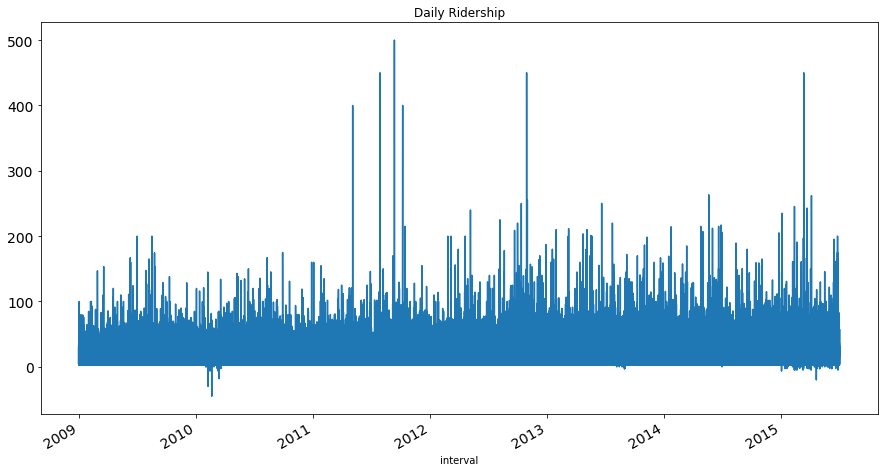

In [242]:
df.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [243]:
test.tail()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2012-06-24 15:45:00,2012-06-24 15:45:00,14.9,4.114250,-74.01,40.73,40.750437,40.750437
2012-09-30 04:00:00,2012-09-30 04:00:00,11.5,4.432105,-73.97,40.76,40.744792,40.744792
2012-10-07 12:30:00,2012-10-07 12:30:00,24.0,7.178145,-73.78,40.65,40.709547,40.709547
2011-04-17 20:30:00,2011-04-17 20:30:00,4.9,1.260764,-73.99,40.73,40.734530,40.734530
2015-05-10 13:00:00,2015-05-10 13:00:00,7.5,1.695467,-73.95,40.77,40.772377,40.772377


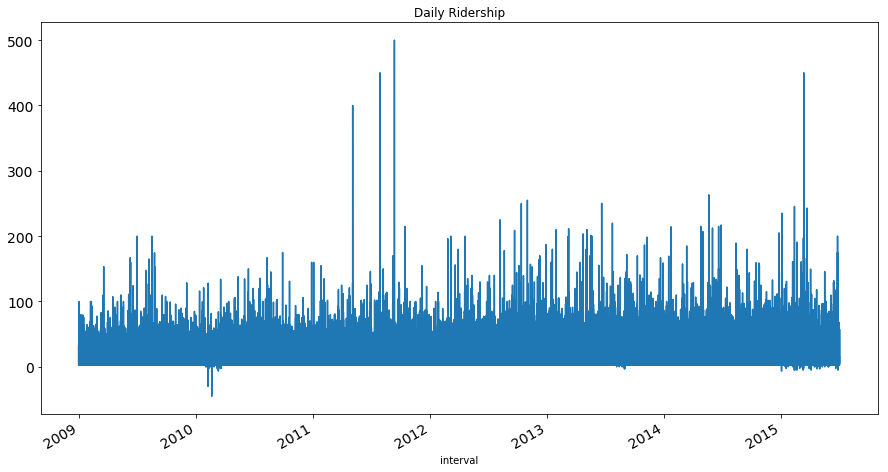

In [244]:
train.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

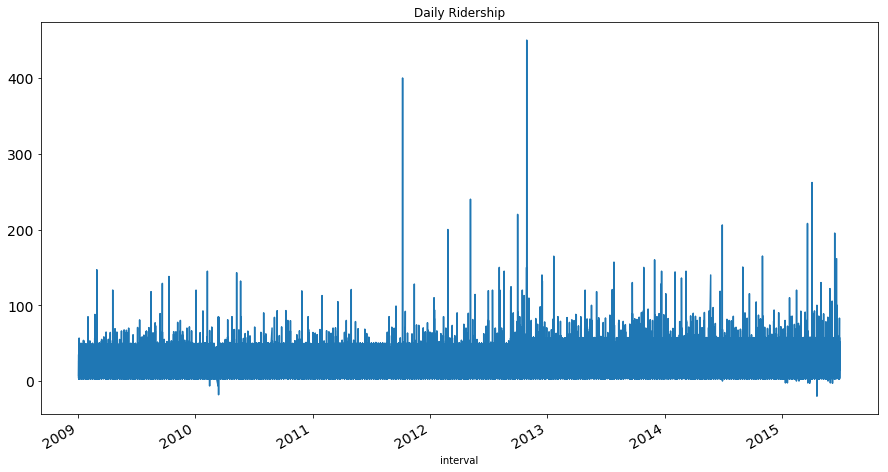

In [245]:
test.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [246]:
df.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
x_train = train.drop(['fare_amount','interval'], axis=1)
x_test = test.drop(['fare_amount','interval'], axis=1)
y_train = train[['fare_amount']]
y_test = test[['fare_amount']]

In [249]:
y_train= y_train.apply(np.int64)

In [250]:
y_test= y_test.apply(np.int64)

In [251]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [252]:
x_train.head()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,
2009-06-15 17:15:00,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,2.811899,-74.00,40.73,40.721325,40.721325


In [253]:
x_train.dtypes

distance            float64
pickup_longitude    float64
pickup_latitude     float64
dropoff_latitude    float64
dropoff_latitude    float64
dtype: object

In [254]:
x_train.describe()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
count,798157.000000,798157.000000,798157.000000,798157.000000,798157.000000
mean,4.169488,-72.590643,39.964698,39.964592,39.964592
std,4.701105,10.137820,5.977154,5.963513,5.963513
min,0.000000,-121.390000,-74.020000,-74.035197,-74.035197
25%,1.554230,-73.990000,40.740000,40.734932,40.734932
50%,2.709729,-73.980000,40.750000,40.753753,40.753753
75%,4.916724,-73.970000,40.770000,40.768153,40.768153
max,98.419500,40.850000,401.080000,47.890090,47.890090


In [255]:
df.loc[df["fare_amount"] > 200]

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,,
2013-01-28 21:30:00,2013-01-28 21:30:00,210.00,0.741964,-74.41,40.85,40.854787,40.854787
2012-08-06 02:30:00,2012-08-06 02:30:00,225.00,0.452913,-73.54,41.05,41.047218,41.047218
2014-05-19 10:00:00,2014-05-19 10:00:00,263.25,0.366801,-74.41,40.48,40.479165,40.479165
2013-04-22 15:15:00,2013-04-22 15:15:00,203.50,64.897208,-73.87,40.77,40.787527,40.787527
2013-07-22 22:30:00,2013-07-22 22:30:00,220.00,0.377280,-73.49,41.06,41.059311,41.059311
2011-09-12 09:30:00,2011-09-12 09:30:00,500.00,0.406956,-73.97,40.64,40.640595,40.640595
2012-10-30 20:30:00,2012-10-30 20:30:00,255.00,0.261119,-73.92,40.74,40.741577,40.741577
2015-02-10 12:00:00,2015-02-10 12:00:00,245.41,96.015606,-73.79,40.65,40.314682,40.314682
2014-04-30 20:45:00,2014-04-30 20:45:00,207.05,60.979248,-73.88,40.77,40.536990,40.536990


In [256]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [257]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [258]:
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [259]:
y_pred = regr.predict(x_test)


In [260]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.72414571  0.19134137 -0.08718418  0.12279938  0.12279938]]


In [261]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 30.42
Variance score: 0.68


In [262]:
accuracy = regr.score(x_test,y_test)
print(accuracy*100,'%')

68.48736824438828 %


In [274]:
var_train.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,
2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [269]:
var_train = train.drop(['interval'], axis=1)
var_test = test.drop(['interval'], axis=1)

In [270]:
model = VAR(endog=var_train)


C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [271]:
model_fit = model.fit()


In [272]:
prediction = model_fit.forecast(model_fit.y, steps=len(y_test))

In [273]:
prediction

array([[ 11.31739338,   4.16889947, -72.58485593,  39.96074393,
         39.96054669,  39.96054669],
       [ 11.31433776,   4.16948668, -72.59062782,  39.96468873,
         39.96458304,  39.96458304],
       [ 11.31432975,   4.16949202, -72.59064092,  39.96469655,
         39.96459081,  39.96459081],
       ...,
       [ 11.31432973,   4.16949204, -72.59064095,  39.96469657,
         39.96459083,  39.96459083],
       [ 11.31432973,   4.16949204, -72.59064095,  39.96469657,
         39.96459083,  39.96459083],
       [ 11.31432973,   4.16949204, -72.59064095,  39.96469657,
         39.96459083,  39.96459083]])

In [278]:
cols=var_train.columns.values

In [284]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,6):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]



In [285]:
import math

In [287]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for fare_amount is :  9.813337136151583
rmse value for distance is :  4.853859555353904
rmse value for pickup_longitude is :  10.288082711516017
rmse value for pickup_latitude is :  6.073181353735921
rmse value for dropoff_latitude is :  6.073232760382862
rmse value for dropoff_latitude is :  6.073232760382862


In [ ]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

In [420]:
y_hat_avg = test.copy()
y_hat_avg['t_fare_amount'] = train['fare_amount'].mean()

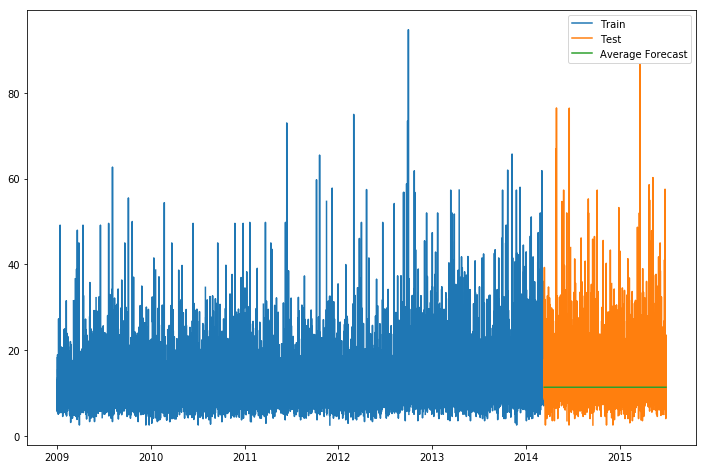

In [421]:
plt.figure(figsize=(12,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['t_fare_amount'], label='Average Forecast')
plt.legend(loc='best')

In [422]:
df1 = df.copy()

In [423]:
df1['moving_avg_forecast'] = df['fare_amount'].rolling(60).mean()

In [439]:
y_hat_avg = test.copy()

In [433]:
train_size = int(len(df1) * 0.80)
train, test = df1[0:train_size], df1[train_size:len(df)]

In [436]:
test.head()

,fare_amount,id,moving_avg_forecast
interval,,,
2014-03-13 14:17:00,10.741500,45544,NaN
2014-03-13 15:17:00,12.135000,45545,NaN
2014-03-13 16:17:00,14.221905,45546,NaN
2014-03-13 17:17:00,10.644783,45547,NaN
2014-03-13 18:17:00,13.266571,45548,NaN


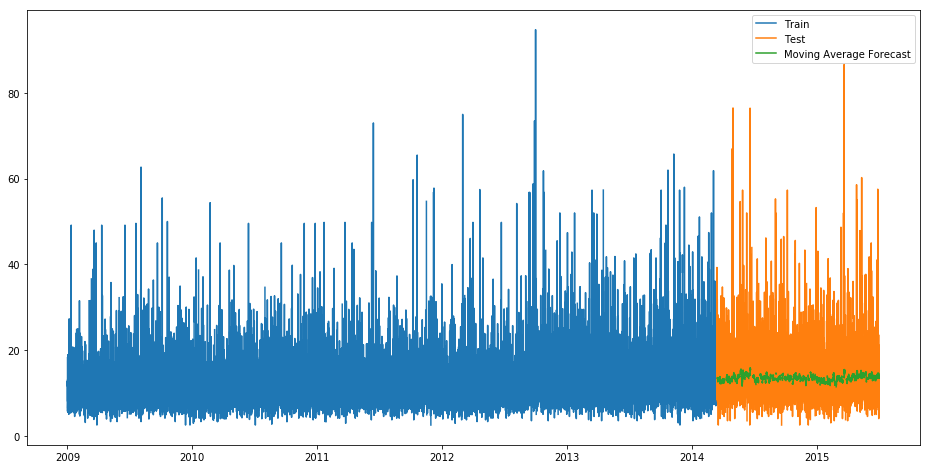

In [440]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [441]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [482]:
train['fare_amount'].isnull().sum()

299

In [481]:
train['fare_amount'].fillna(train['fare_amount'].mean())

interval
2008-12-31 23:17:00    11.666667
2009-01-01 00:17:00     9.666667
2009-01-01 01:17:00     8.800000
2009-01-01 02:17:00    12.811111
2009-01-01 03:17:00     8.470000
2009-01-01 04:17:00     8.711111
2009-01-01 05:17:00     8.166667
2009-01-01 06:17:00    11.318574
2009-01-01 07:17:00    18.200000
2009-01-01 08:17:00     5.700000
2009-01-01 09:17:00    16.300000
2009-01-01 10:17:00     9.328571
2009-01-01 11:17:00    11.700000
2009-01-01 12:17:00    10.520000
2009-01-01 13:17:00    10.344118
2009-01-01 14:17:00     7.490909
2009-01-01 15:17:00     7.646667
2009-01-01 16:17:00     7.866667
2009-01-01 17:17:00    13.138889
2009-01-01 18:17:00    11.758696
2009-01-01 19:17:00    11.025000
2009-01-01 20:17:00     6.427273
2009-01-01 21:17:00     8.390000
2009-01-01 22:17:00     8.035294
2009-01-01 23:17:00    12.406250
2009-01-02 00:17:00     7.450000
2009-01-02 01:17:00    12.266667
2009-01-02 02:17:00    11.200000
2009-01-02 03:17:00    11.318574
2009-01-02 04:17:00    10.700000
 

In [487]:
# create class
model = SimpleExpSmoothing(train['fare_amount'])

In [488]:
# fit model
model_fit = model.fit(smoothing_level=0.6,optimized=False)

In [489]:
y_hat_avg = test.copy()

In [490]:
model_fit.forecast(len(test['fare_amount'])-100)

2014-03-13 14:17:00   NaN
2014-03-13 15:17:00   NaN
2014-03-13 16:17:00   NaN
2014-03-13 17:17:00   NaN
2014-03-13 18:17:00   NaN
2014-03-13 19:17:00   NaN
2014-03-13 20:17:00   NaN
2014-03-13 21:17:00   NaN
2014-03-13 22:17:00   NaN
2014-03-13 23:17:00   NaN
2014-03-14 00:17:00   NaN
2014-03-14 01:17:00   NaN
2014-03-14 02:17:00   NaN
2014-03-14 03:17:00   NaN
2014-03-14 04:17:00   NaN
2014-03-14 05:17:00   NaN
2014-03-14 06:17:00   NaN
2014-03-14 07:17:00   NaN
2014-03-14 08:17:00   NaN
2014-03-14 09:17:00   NaN
2014-03-14 10:17:00   NaN
2014-03-14 11:17:00   NaN
2014-03-14 12:17:00   NaN
2014-03-14 13:17:00   NaN
2014-03-14 14:17:00   NaN
2014-03-14 15:17:00   NaN
2014-03-14 16:17:00   NaN
2014-03-14 17:17:00   NaN
2014-03-14 18:17:00   NaN
2014-03-14 19:17:00   NaN
                       ..
2015-06-25 14:17:00   NaN
2015-06-25 15:17:00   NaN
2015-06-25 16:17:00   NaN
2015-06-25 17:17:00   NaN
2015-06-25 18:17:00   NaN
2015-06-25 19:17:00   NaN
2015-06-25 20:17:00   NaN
2015-06-25 2

In [491]:
y_hat_avg['SES']

KeyError: 'SES'

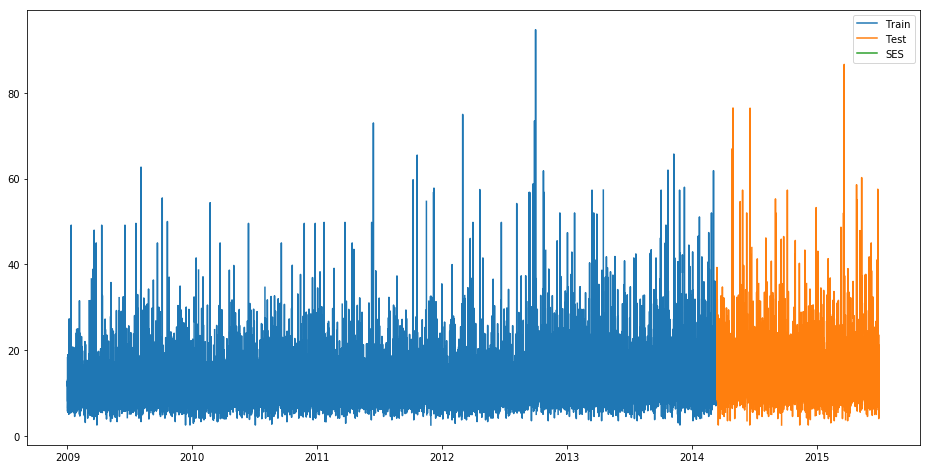

In [446]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')